Problem 1

In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
df= pd.read_csv("faithful.csv")

In [73]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Text(0, 0.5, 'Waiting Time (mins)')

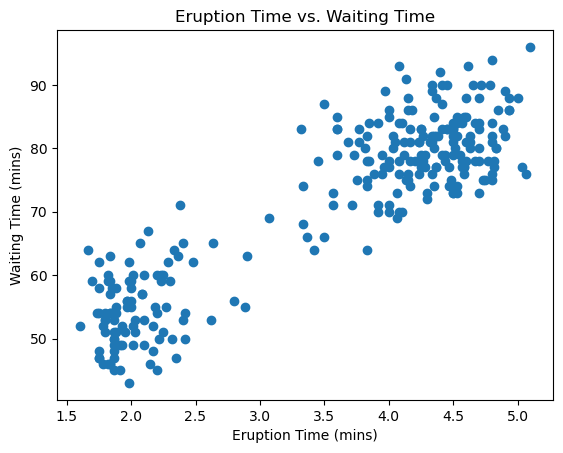

In [74]:
# (a)
plt.scatter(df['eruptions'],df['waiting'])
plt.title('Eruption Time vs. Waiting Time')
plt.xlabel('Eruption Time (mins)')
plt.ylabel('Waiting Time (mins)')

(b)How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)

By looking at the graph we can see 2 clusters 

(c)Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points)

Steps for hierchical clustering algorithm are :

1.	Gather the data and preprocess it as necessary to prepare it. The data may need to be cleaned, normalized, or a subset of pertinent attributes may need to be chosen.

2.	Select a distance metric to use in measuring how similar two pairs of data points are. We can use to calculate distance measures such as  Euclidean distance, Manhattan distance, and cosine similarity 

3.	Choose a connection criterion that will dictate how to calculate the separation between clusters.
4.	Make a distance matrix: Based on the selected distance metric, compute the distance matrix that depicts the distance between each pair of data points.

5.	Make first clusters: At the beginning, each data point is a different cluster.

6.	Clusters should be merged starting with the two closest clusters according to the selected linkage criterion.

7.	Recalculate the distances between the new cluster and the other clusters to update the distance matrix.

8.	Repeat steps 6 and 7 until all data points are part of a single cluster or a halting requirement is satisfied. Continue merging the closest clusters and updating the distance matrix.

9.	The ideal number of clusters should be determined: Determine the ideal number of clusters to employ for analysis based on the clustering results and domain knowledge. 

Yes, I think this method is appropriate for the dataset as I think it is a common way to visualize the relationship between two common variables such as eruption time and waiting time given in this question. The scatter plot also shows that there is a strong correlation between eruption time and waiting time, indicating eruptions with longer duration time tend to have longer waiting times and vice versa. In this scenario, the Scatter plot is making easier to interpret the data really well and we can understand the relation between eruption time and waiting time without getting confused. 





Problem 2

In [75]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
import random


In [76]:
x = df['eruptions']
y = df['waiting']

In [77]:
# (a)
#KMeans algorithm from scratch
# the dataset's format must be modified as necessary in order to be input into the algorithm.
X = []
for i,j in zip(x,y):
  X.append([i,j])
def euclidean_distance(point, data):
    # euclidean distance between point & data.
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans_algo:
    def __init__(self, n_clusters=8, max_iter=300):
      # number of iterations to be 300 
      # clusters to the usual default value
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.inertia = []
    def fit_algo(self, X_train):
        random.seed(77)
        # we need to have a random centroids to initialize the alogirthm with
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # finding the distances from points to each of its respective centroids
            dists = np.sum([euclidean_distance(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalizing the distances as shown below
            dists /= np.sum(dists)
            # choosing the remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # Since the centroids' initial locations are chosen at random, optimizing the centroid locations according to their distances
        # Adjusting the centroids' locations until they have converged to the best spot and iterating till the ideal point

        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # sorting each datapoint and assigning them to their nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean_distance(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Relocating the centroids as the mean of their respective points and converting the current centroids to the prior ones

            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            # determining the inertia for each iteration and storing both to be used in future plots 

            self.set_inertia(X_train, iteration)
            iteration += 1
    # cluster evaluation function for the algorithm
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean_distance(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
    
    # creating a method to find interia for a particular iteration of the algorithm
    def set_inertia(self, X, iteration_idx):
      inertia = 0
      pred = self.evaluate(X)[0]
      for idx in range(len(X)):
        c = pred[idx]
        p = X[idx]
        p_inertia = (p[0]-c[0])**2 + (p[1]-c[1])**2
        inertia += p_inertia
      self.inertia.append((iteration_idx,inertia))
      

# setting the centers as 2 since there are 2 clusters as shown from the above plots
centers = 2
# using the standard scaler to transform the data
X_train = StandardScaler().fit_transform(X)
# calling the KMeans algorithm with the parameter centers
obj = KMeans_algo(n_clusters=centers)
obj.fit_algo(X_train)

# clustering and predicting the data points by dividing them into their corresponding groups

predicted_y=obj.evaluate(X_train)
predicted_y = predicted_y[1]



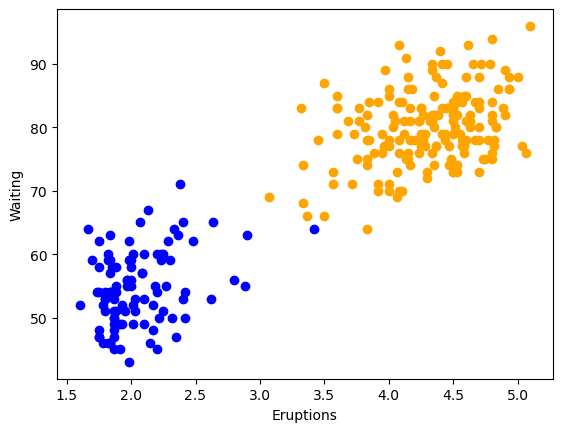

In [78]:
# (b) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot.
df['cluster'] = predicted_y
a=df.cluster==0
b=df.cluster==1
df_cr0=df[a]
df_cr1=df[b]
plt.scatter(df_cr0.eruptions,df_cr0.waiting,color='orange')
plt.scatter(df_cr1.eruptions,df_cr1.waiting,color='blue')
plt.xlabel("Eruptions")
plt.ylabel("Waiting")
plt.show()

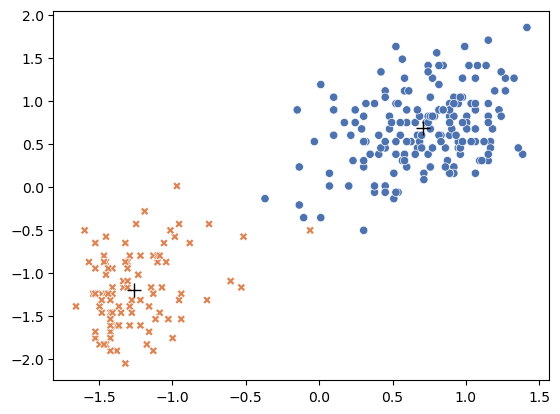

In [79]:
class_centers, classification = obj.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=predicted_y,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in obj.centroids],
         [y for _, y in obj.centroids],
         'k+',
         markersize=10,
         )
plt.show()

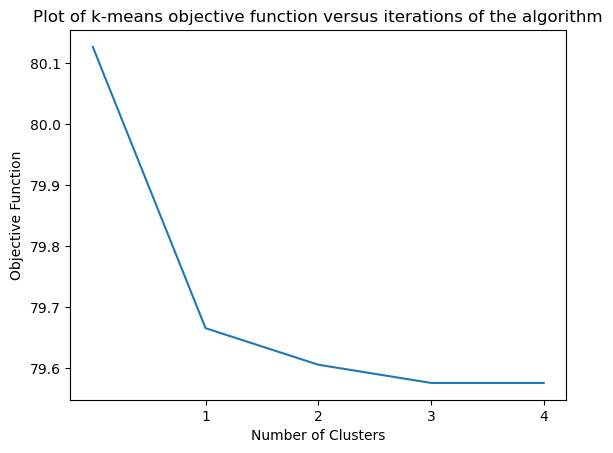

In [80]:
x = [i[0] for i in obj.inertia]
y = [i[1] for i in obj.inertia]
# plot of the k-means objective function versus iterations of the algorithm using the inertia that is calculated before
plt.plot(x, y)
plt.xticks(range(1, len(x)))
plt.title("Plot of k-means objective function versus iterations of the algorithm")
plt.xlabel("Number of Clusters")
plt.ylabel("Objective Function")
plt.show()


(d) Yes, this approach assisted me in identifying the clusters in problem 1.